In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import keras as k
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 8
import h5py

In [3]:
import os
print(os.listdir("D:/dataset/train"))

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [4]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("D:/dataset/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [5]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict
label_ids = np.array([label_to_id_dict[x] for x in labels])
fruit_images.shape, label_ids.shape, labels.shape

((10901, 110, 110, 3), (10901,), (10901,))

In [6]:
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("D:/dataset/test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

validation_fruit_images.shape
label_to_id_dict = {v:i for i,v in enumerate(np.unique(validation_labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [7]:
X_train, X_test = fruit_images, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_flat_train = X_train.reshape(X_train.shape[0], 110*110*3)
X_flat_test = X_test.reshape(X_test.shape[0], 110*110*3)

In [10]:
Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)

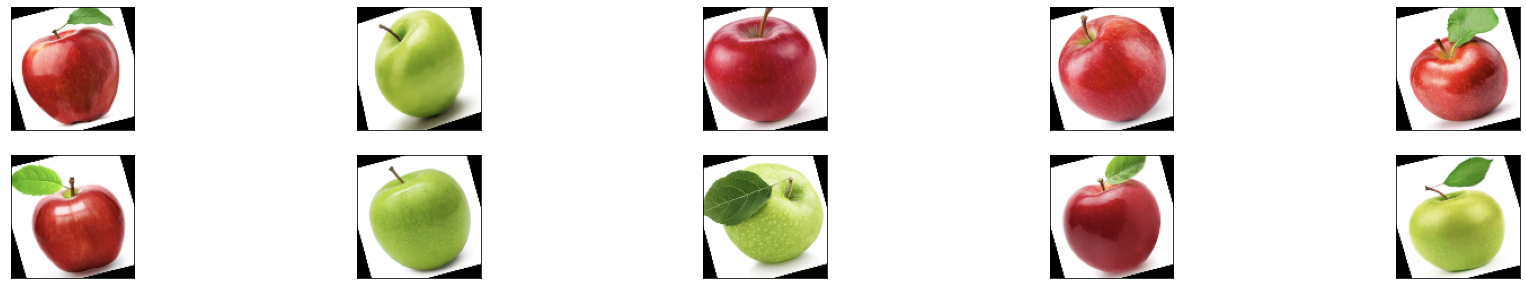

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [16]:
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(110, 110, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(6, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)

Train on 10901 samples, validate on 2698 samples
Epoch 1/30
10901/10901 [==============================] - 227s 21ms/step - loss: 1.9003 - accuracy: 0.4643 - val_loss: 1.2513 - val_accuracy: 0.5271
Epoch 2/30
10901/10901 [==============================] - 226s 21ms/step - loss: 0.8429 - accuracy: 0.6923 - val_loss: 0.8303 - val_accuracy: 0.6898
Epoch 3/30
10901/10901 [==============================] - 221s 20ms/step - loss: 0.6210 - accuracy: 0.7808 - val_loss: 0.3937 - val_accuracy: 0.8632
Epoch 4/30
10901/10901 [==============================] - 226s 21ms/step - loss: 0.5031 - accuracy: 0.8285 - val_loss: 0.5797 - val_accuracy: 0.8084
Epoch 5/30
10901/10901 [==============================] - 220s 20ms/step - loss: 0.4064 - accuracy: 0.8551 - val_loss: 0.2808 - val_accuracy: 0.8962
Epoch 6/30
10901/10901 [==============================] - 219s 20ms/step - loss: 0.3370 - accuracy: 0.8826 - val_loss: 0.3035 - val_accuracy: 0.8944
Epoch 7/30
10901/10901 [==============================] -

In [17]:
model_cnn.save

<bound method Network.save of <keras.engine.sequential.Sequential object at 0x000001695362C608>>

In [18]:
from keras.models import load_model

In [21]:
model_cnn.save('model.h5')